# MSN 514 - Chapter 12: Poincare

## ODE Solver

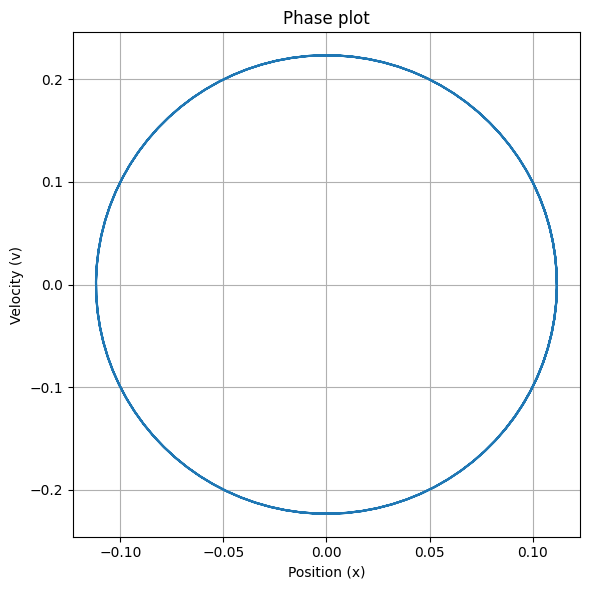

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of ODEs for the harmonic oscillator
def harmonic_oscillator(t, y, omega):
    x, v = y
    dxdt = v
    dvdt = -omega**2 * x
    return [dxdt, dvdt]

# Parameters
omega = 2.0  # angular frequency
x0 = [0.1, 0.1]  # initial conditions [x(0), v(0)]

# Time span for the solution
t_span = (0, 10)
t_eval = np.linspace(*t_span, 300)

# Solve the ODEs
sol = solve_ivp(harmonic_oscillator, t_span, x0, args=(omega,), t_eval=t_eval)

# Plotting the results
plt.figure(figsize=(6, 6))

# Position over time
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.title('Phase plot')
plt.grid(True)
plt.tight_layout()
plt.show()


## 1D ODE solver

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Define the system of ODEs for the harmonic oscillator
def flow_1D(t, y):
    x1 = y
    dx1dt = np.sin(x1)
    return [dx1dt]

def parametric_flow_1D(x0):
    x0 = [x0]  # Initial condition

    # Time span for the solution
    t_span = (0, 10)
    t_eval = np.linspace(*t_span, 300)

    # Solve the ODE
    sol = solve_ivp(flow_1D, t_span, x0, t_eval=t_eval)

    # Plotting the result
    plt.figure(figsize=(10, 4))  # Define the size of the figure
    plt.plot(t_eval, sol.y[0])
    plt.xlabel('Time (t)')
    plt.ylabel('x(t)')
    plt.title('Time plot')
    plt.grid(True)
    plt.ylim(-2*np.pi, 2*np.pi)
    plt.show()

# Create the interactive widget
widgets.interact(parametric_flow_1D, x0=(-2*np.pi, 2*np.pi, 0.1))


interactive(children=(FloatSlider(value=-0.08318530717958605, description='x0', max=6.283185307179586, min=-6.…

<function __main__.parametric_flow_1D(x0)>

## Phase portrait 2D linear flow

In [ ]:
import numpy as np
import pygame
from scipy.integrate import solve_ivp
import sys

# Define the differential equation
def odefcn(t, x):
    return [1*x[0] + 1*x[1], 4*x[0] - 2*x[1]]

# Initialize Pygame
pygame.init()
width, height = 600, 600
screen = pygame.display.set_mode((width, height))
clock = pygame.time.Clock()

# Transform function to fit the coordinates in pygame window
def transform(x, y):
    return int(75 * x + width // 2), int(-75 * y + height // 2)

# Drawing the arrows for the phase portrait
def draw_vector_field():
    for x1 in np.arange(-4, 4.25, 0.25):
        for x2 in np.arange(-4, 4.25, 0.25):
            dx1, dx2 = odefcn(0, [x1, x2])
            r = np.sqrt(dx1**2 + dx2**2)
            if r != 0:
                dx1, dx2 = dx1 / r, dx2 / r
                start = transform(x1, x2)
                end = transform(x1 + 0.25 * dx1, x2 + 0.25 * dx2)
                pygame.draw.line(screen, (255, 0, 0), start, end, 1)
                pygame.draw.circle(screen, (255, 0, 0), end, 2)
            # else:
            #     start = transform(x1, x2)
            #     pygame.draw.circle(screen, (0, 255, 0), start, 2)  # Mark zero-vector points


# Main loop
running = True
while running:
    screen.fill((0, 0, 0))  # Clear the screen first

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            draw_vector_field()  # Then draw vector field
            x0, y0 = pygame.mouse.get_pos()
            x0 = (x0 - width // 2) / 75
            y0 = -(y0 - height // 2) / 75
            sol = solve_ivp(odefcn, [0, 2], [x0, y0], t_eval=np.linspace(0, 2, 50))
            path = [transform(*point) for point in zip(sol.y[0], sol.y[1])]
            pygame.draw.lines(screen, (0, 255, 0), False, path, 3)
            pygame.draw.line(screen, (0, 0, 255), transform(-4,-4), transform(4,4), 2)
            pygame.draw.line(screen, (0, 0, 255), transform(1,-4), transform(-1,4), 2)
            pygame.display.flip()  # Update the display

    
    clock.tick(60)  # Limit the frame rate

pygame.quit()
sys.exit()


## Phase portrait

## Rabbit versus sheep

## Van der Pol oscillator

## Glycolysis equations

## Hopf bifurcation